In [18]:
import os,re
import requests as rq
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import spotipy

In [19]:
data = rq.get("https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&format=json&titles=List_of_hip_hop_musicians").json()
list_markup = data["query"]["pages"]["140853"]["revisions"][0]["*"]
link_regex = r"\* \[\[(.+?)[\(\]]"

rappers = re.findall(link_regex, list_markup)

In [20]:
with open("rappers.txt", 'w') as f:
    for r in rappers:
        f.write(r.encode('utf-8') + "\n")

In [68]:
import spotipy.oauth2 as oauth2

# When an error occurs saying the token expired, re-run this cell.
# Tokens are 1 hour I think.
client_id = 'e3344de9f0454df280cc34cdba040bf7'
client_secret = 'da09e980b2fb4f11a68a3c00a2669a7d'

credentials = oauth2.SpotifyClientCredentials(
        client_id=client_id,
        client_secret=client_secret)

token = credentials.get_access_token()
spotify = spotipy.Spotify(auth=token)

In [5]:
def get_albums(rapper):
    results = spotify.search(q='artist:%s' % rapper,type='artist')
    
    artist_id = results['artists']['items'][0]['uri']
    
    albums = spotify.artist_albums(artist_id)
    
    # For some reason duplicates some albums. Wrap as a set
    return set([album['name'] for album in albums['items']])

In [22]:
def get_album_artists(album_name):
    results = spotify.search(q='album:%s' % album_name,type='album')
    
    album_id = results['albums']['items'][0]['uri']
    
    tracks = spotify.album_tracks(album_id)
    return set([artist['name']  
            for track in tracks['items']
            for artist in track['artists']])

In [23]:
def get_collaborators(rapper):
    """Returns a dictionary of album:artists entry"""
    
    albums = get_albums(rapper)
    
    return {album:list(get_album_artists(album)) for album in albums}

In [49]:
try:
    a = get_collaborators("100 Kila")
except IndexError:
    print "FAILED"

In [38]:
set([item for sublist in a.values() for item in sublist])

{u'2 Chainz',
 u'Big Sean',
 u'Black Coffee',
 u'Detail',
 u'Drake',
 u'Future',
 u'Giggs',
 u'JAY Z',
 u'Jhene Aiko',
 u'Jorja Smith',
 u'Kanye West',
 u'Kyla',
 u'Lil Wayne',
 u'Majid Jordan',
 u'Michael Jackson',
 u'PARTYNEXTDOOR',
 u'Pimp C',
 u'Quavo',
 u'Rihanna',
 u'Sampha',
 u'Static Major',
 u'Travis Scott',
 u'Ty Dolla $ign',
 u'WizKid',
 u'Young Thug',
 u'dvsn'}

In [40]:
rappers = set()

with open("rappers.txt", "r") as f: 
    for r in f:
        rappers.add(r)
        

In [69]:
#collaboration_network = nx.Graph()

for r in list(rappers):
    print 'Processing rapper:', r
    try:
        #gets collaborators by album
        c_by_a = get_collaborators(r)
        #sorts collaborators into one set
        collaborators = set([item for sublist in c_by_a.values() for item in sublist])
    except IndexError:
        continue
    for c in collaborators: 
        collaboration_network.add_edge(r,c)
        

Processing rapper: K Camp

Processing rapper: SpaceGhostPurrp

Processing rapper: Bizarre 

Processing rapper: Shyheim

Processing rapper: Max B

Processing rapper: Jennifer Lopez

Processing rapper: Verse Simmonds

Processing rapper: Havoc 

Processing rapper: BlocBoy JB

Processing rapper: Mod Sun

Processing rapper: Jaden Smith

Processing rapper: 9th Wonder

Processing rapper: B-Real

Processing rapper: Yung Joc

Processing rapper: J-Hope

Processing rapper: Ab-Soul

Processing rapper: Driicky Graham

Processing rapper: Johntá Austin

Processing rapper: Method Man

Processing rapper: Syd Tha Kyd

Processing rapper: Shaquille O'Neal

Processing rapper: Beanie Sigel

Processing rapper: Dillon Cooper

Processing rapper: Stalley

Processing rapper: Beenzino

Processing rapper: Ty Dolla Sign

Processing rapper: Yazz The Greatest

Processing rapper: Steady B

Processing rapper: Kent Jones 

Processing rapper: Kurious

Processing rapper: Daz Dillinger

Processing rapper: Torch 

Processin

SSLError: HTTPSConnectionPool(host='api.spotify.com', port=443): Max retries exceeded with url: /v1/albums/07Pg0yiPwyCLLPKiozaefG/tracks/?limit=50&offset=0 (Caused by SSLError(SSLError("bad handshake: SysCallError(-1, 'Unexpected EOF')",),))

In [64]:
import json

In [65]:
with open('rappers_network.json', 'w') as fp:
    json.dump(nx.node_link_data(collaboration_network), fp)

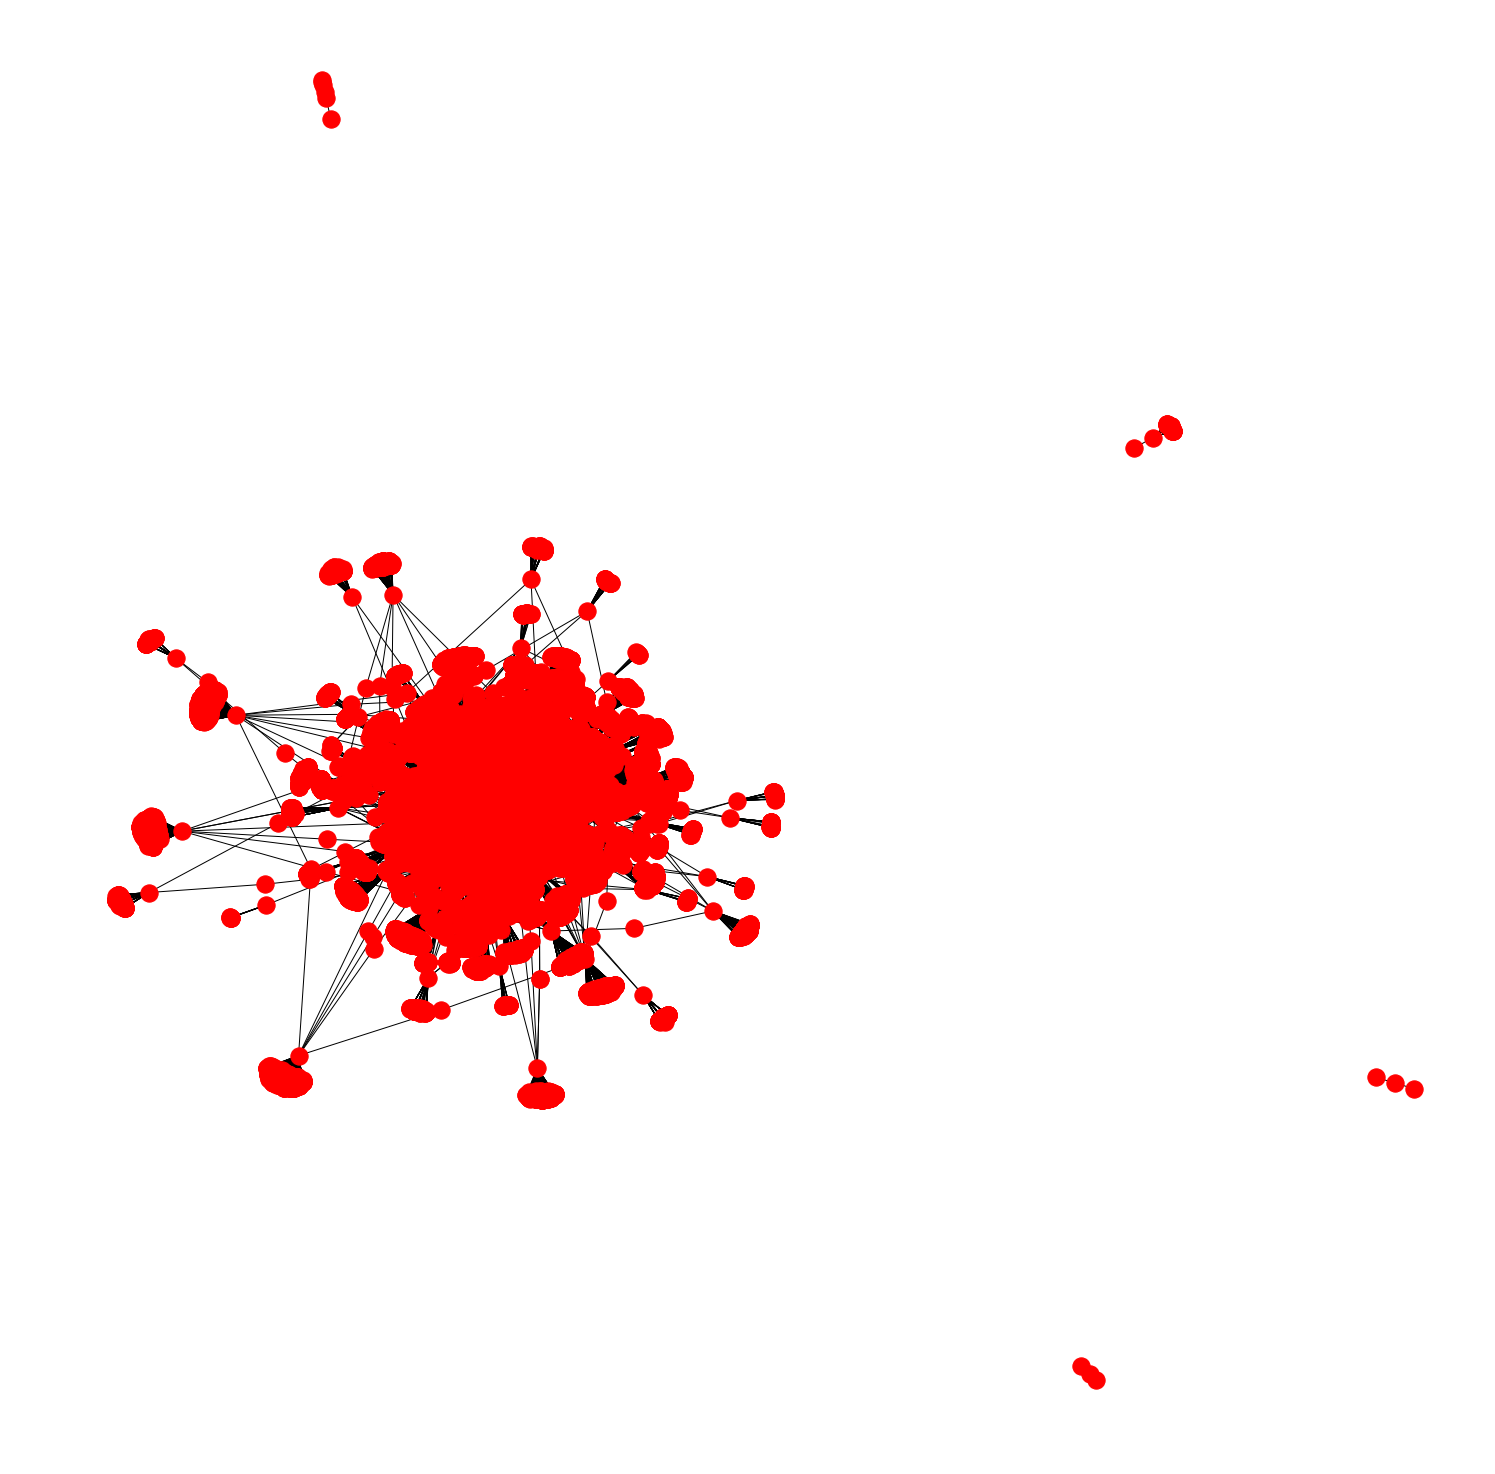

In [70]:
plt.figure(figsize=[20,20])
nx.draw(collaboration_network)
plt.show()

In [71]:
!git add .

The file will have its original line endings in your working directory.
The file will have its original line endings in your working directory.
The file will have its original line endings in your working directory.
The file will have its original line endings in your working directory.


In [72]:
!git commit -m "beginning to create a network"

[master 889985e] beginning to create a network
 6 files changed, 1118 insertions(+), 94 deletions(-)
 create mode 100644 .ipynb_checkpoints/IMG-4472-checkpoint.JPG
 create mode 100644 .ipynb_checkpoints/README-checkpoint.md
 create mode 100644 .ipynb_checkpoints/create_network-checkpoint.ipynb
 create mode 100644 create_network.ipynb
 create mode 100644 rappers_network.json


In [73]:
!git pull origin master

Auto-merging get_data.ipynb
CONFLICT (content): Merge conflict in get_data.ipynb
Automatic merge failed; fix conflicts and then commit the result.


From https://github.com/allengueco/rap_aggression
 * branch            master     -> FETCH_HEAD
   8725aed..1d6664a  master     -> origin/master


In [74]:
!git push origin master

To https://github.com/allengueco/rap_aggression.git
 ! [rejected]        master -> master (non-fast-forward)
error: failed to push some refs to 'https://github.com/allengueco/rap_aggression.git'
hint: Updates were rejected because the tip of your current branch is behind
hint: its remote counterpart. Integrate the remote changes (e.g.
hint: 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


In [75]:
!git pull origin master

error: Pulling is not possible because you have unmerged files.
hint: Fix them up in the work tree, and then use 'git add/rm <file>'
hint: as appropriate to mark resolution and make a commit.
fatal: Exiting because of an unresolved conflict.


In [ ]:
!git add .